In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Use pandas to create a Series from the following data:

In [433]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", 
                  "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", 
                  "gooseberry", "papaya"])

fruits
#Name the variable that holds the series fruits.

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [21]:
#Run .describe() on the series to see what describe returns for a series of strings.

fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [557]:
#Run the code necessary to produce only the unique fruit names.
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [34]:
#Determine how many times each value occurs in the series.
fruits.value_counts()

kiwi                4
mango               2
pineapple           1
blueberry           1
tomato              1
strawberry          1
watermelon          1
gooseberry          1
papaya              1
blackberry          1
gala apple          1
honeydew            1
honeycrisp apple    1
dtype: int64

In [33]:
#Determine the most frequently occurring fruit name from the series.
fruits.value_counts().head(1)

#fruits.value_counts().nlargest(n=1, keep='all') --> another way to accomplish this

kiwi    4
dtype: int64

In [35]:
#Determine the least frequently occurring fruit name from the series.
fruits.value_counts().tail(1)

honeycrisp apple    1
dtype: int64

In [68]:
#Write the code to get the longest string from the fruits series.
fruits.str.len().sort_values(ascending=False)
fruits[5]

#max(fruits, key=len) is a really good way to achieve this

'honeycrisp apple'

In [558]:
#another way to accomplish this, especially when multiple values are the smallest:
fruits.value_counts().nsmallest(n=1, keep='all')

pineapple           1
blueberry           1
tomato              1
strawberry          1
watermelon          1
gooseberry          1
papaya              1
blackberry          1
gala apple          1
honeydew            1
honeycrisp apple    1
dtype: int64

In [440]:
#Find the fruit(s) with 5 or more letters in the name.
fruits_with_5 = fruits[fruits.apply(lambda x: len(str(x)) >= 5)]
fruits_with_5

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [559]:
#Capitalize all the fruit strings in the series.
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [152]:
#Count the letter "a" in all the fruits (use string vectorization)
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [560]:
#Output the number of vowels in each and every fruit.
vowels = list('aeiou')
vowels

['a', 'e', 'i', 'o', 'u']

In [562]:
vowel_counts=fruits.str.count(r'[aeiou]')
vowel_counts

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [566]:
#Use the .apply method and a lambda function to find the fruit(s) 
#containing two or more "o" letters in the name.

fruits[fruits.apply(lambda fruit: fruit.count('o') > 1)]

6         tomato
15    gooseberry
dtype: object

In [567]:
#Write the code to get only the fruits containing "berry" in the name
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [568]:
#Write the code to get only the fruits containing "apple" in the name
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [570]:
#Which fruit has the highest amount of vowels?
max_vowels = vowel_counts = fruits.str.count(r'[aeiou]').max()

## 2. Use pandas to create a Series from the following data:

In [171]:
money = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', 
 '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', 
 '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', 
 '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [157]:
money

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

In [172]:
#What is the data type of the series?

money.dtype

dtype('O')

In [571]:
#Use series operations to convert the series to a numeric data type.

money_series = money.str.replace('$','').str.replace(',','').astype('float')

In [572]:
#checking conversion to float:

money_series.dtype

dtype('float64')

In [573]:
#What is the maximum value? The minimum?

money_series.max(), money_series.min()

(4789988.17, 278.6)

In [186]:
#Bin the data into 4 equally sized intervals and show how many values fall into each bin.

pd.cut(money_series, bins=4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

Text(0, 0.5, 'Frequency')

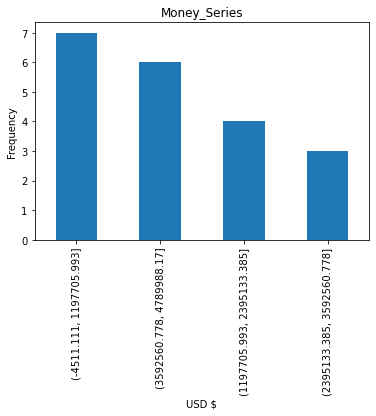

In [479]:
#Plot a histogram of the data. Be sure to include a title and axis labels.

money_series.value_counts(bins=4).plot.bar()
plt.title('Money_Series')
plt.xlabel('USD $')
plt.ylabel('Frequency')

## 3. Use pandas to create a Series from the following exam scores:

In [191]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [192]:
exam_scores.dtype

dtype('int64')

In [193]:
#What is the minimum exam score? The max, mean, median?
exam_scores.describe()

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

Text(0, 0.5, 'No of Students in Score Range')

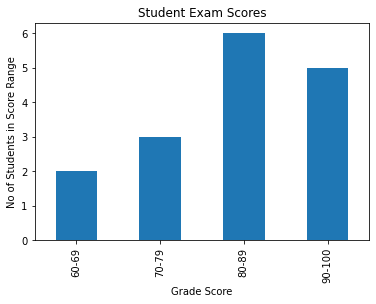

In [575]:
#Plot a histogram of the scores.

bin_edges = [50, 60, 70, 80, 90]
bin_labels = ['60-69', '70-79', '80-89', '90-100']

pd.cut(exam_scores, bins=bin_edges, labels=bin_labels, include_lowest=True).value_counts().sort_index().plot.bar()

plt.title('Student Exam Scores')
plt.xlabel('Grade Score')
plt.ylabel('No of Students in Score Range')

In [270]:
# Convert each of the numbers above into a letter grade. 
# For example, 86 should be a 'B' and 95 should be an 'A'.
bin_edges = [50, 60, 70, 80, 90, 100]
bin_labels=['F', 'D', 'C', 'B', 'A']
pd.cut(exam_scores, bins=bin_edges, labels=bin_labels)

0     F
1     B
2     C
3     D
4     A
5     C
6     F
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [271]:
#Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, 
#and that many points should be given to every other score as well.
exam_scores + 4

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

## 4. Use pandas to create a Series from the following string:

In [508]:
string = pd.Series(['hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'])

In [509]:
string.dtype

dtype('O')

In [576]:
" ".join(string)

'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [577]:
#split string into a list as new_string
new_string = string.str.strip().str.split(' ', expand=True)

In [578]:
new_string

,0
0,hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyf...


In [512]:
#convert string into an array
np.array([new_string])

array([[['', 'h', 'n', 'v', 'i', 'd', 'd', 'u', 'c', 'k', 'k', 'q', 'x',
         'w', 'y', 'm', 'b', 'i', 'm', 'k', 'c', 'c', 'e', 'x', 'b',
         'k', 'm', 'q', 'y', 'g', 'k', 'x', 'o', 'y', 'n', 'd', 'm',
         'c', 'x', 'n', 'w', 'q', 'a', 'r', 'h', 'y', 'f', 'f', 's',
         'j', 'p', 's', 'r', 'a', 'b', 't', 'j', 'z', 's', 'y', 'p',
         'm', 'z', 'a', 'd', 'f', 'a', 'v', 'y', 'r', 'n', 'n', 'd',
         'n', 'd', 'v', 's', 'w', 'r', 'e', 'a', 'u', 'x', 'o', 'v',
         'n', 'c', 'x', 't', 'w', 'z', 'p', 'w', 'e', 'j', 'i', 'l',
         'z', 'j', 'r', 'm', 'm', 'b', 'b', 'g', 'b', 'y', 'x', 'v',
         'j', 't', 'e', 'w', 'q', 't', 'h', 'a', 'f', 'n', 'b', 'k',
         'q', 'p', 'l', 'a', 'r', 'o', 'k', 'k', 'y', 'y', 'd', 't',
         'u', 'b', 'b', 'm', 'n', 'e', 'x', 'o', 'y', 'p', 'u', 'l',
         'z', 'w', 'f', 'h', 'q', 'v', 'c', 'k', 'd', 'p', 'q', 't',
         'p', 'o', 'p', 'p', 'z', 'q', 'r', 'm', 'c', 'v', 'h', 'h',
         'p', 'w', 'g', 'j', '

In [483]:
t_string = new_string.transpose()

In [484]:
t_string

,0
0,
1,h
2,n
3,v
4,i
...,...
197,o
198,g
199,u
200,y


In [513]:
t_string.describe()

,0
count,202
unique,27
top,y
freq,13


In [514]:
#What is the most frequently occuring letter? 
t_string.value_counts().head(1)

y    13
dtype: int64

In [515]:
#Least frequently occuring?
t_string.value_counts().tail(1)

     2
dtype: int64

In [516]:
# How many vowels are in the list?
vowels= list('aeiou')
t_string[t_string.isin(vowels)].count()

0    34
dtype: int64

In [583]:
#How many consonants are in the list?
t_string.count(r'[^aeiou]').sum()

ValueError: No axis named [^aeiou] for object type DataFrame

In [517]:
#Create a series that has all of the same letters, but uppercased
t_string.str.capitalize()

AttributeError: 'DataFrame' object has no attribute 'str'

In [ ]:
#Create a bar plot of the frequencies of the 6 most frequently occuring letters.

## Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

In [584]:
# 17 list comprehension problems in python

fruits = pd.Series(['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange'])

numbers = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9])

In [585]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. 
#Make a variable named uppercased_fruits to hold the output of the list comprehension. 
#Output should be ['MANGO', 'KIWI', etc...]

uppercased_fruits = fruits.str.upper()

uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [430]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output 
#like ['Mango', 'Kiwi', 'Strawberry', etc...]
capitalized_fruits = fruits.str.capitalize()
capitalized_fruits


0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

In [529]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. 
#Hint: You'll need a way to check if something is a vowel.


['a', 'e', 'i', 'o', 'u']

In [ ]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels.
#The result should be ['mango', 'kiwi', 'strawberry']
fruits_with_two_vowels = 

In [586]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters
fruits[fruits.str.len() > 5]

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [587]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters
fruits[fruits.str.len() == 5]

0    mango
3    guava
dtype: object

In [589]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters
fruits[fruits.str.len() < 5]

1    kiwi
dtype: object

In [590]:
# Exercise 8 - Make a list containing the number of characters in each fruit. 
#Output would be [5, 4, 10, etc... ]
fruits.str.len()

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [591]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a 
#list of only the fruits that contain the letter "a"
fruits[fruits.str.contains('a')]

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [544]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 
even_numbers = numbers[numbers % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [542]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers
odd_numbers = numbers[numbers % 2 != 0]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [594]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers
positive_numbers = numbers[numbers > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [530]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers
negative_numbers = numbers[numbers < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

In [601]:
# Exercise 14 - use a list comprehension w/ a conditional in order to produce 
#a list of numbers with 2 or more numerals
numbers[lambda n: (n > 9) or (n < -9)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [531]:
# Exercise 15 - Make a variable named numbers_squared that contains the 
#numbers list with each element squared. Output is [4, 9, 16, etc...]
numbers ** 2

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [540]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains
#only the numbers that are both odd and negative.
numbers[(numbers % 2 != 0) & (numbers < 0)]

19   -9
dtype: int64

In [541]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, 
#return a list containing each number plus five. 
numbers + 5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

In [ ]:
# BONUS Make a variable named "primes" that is a list containing the prime numbers in the 
#numbers list. *Hint* you may want to make or find a helper function that determines 
#if a given number is prime or not.